 (((**object** **detection**))) Faster R-CNN

`torchvision.models,detection.fasterrcnn-resnet50-fpn`

# let's strat:)

In [ ]:
import torch
import torchvision

In [ ]:
print(torch.cuda.get_device_properties(0))

device= 'cuda' if torch.cuda.is_available() else 'cpu'

_CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)


# 1

to (device) : for GPU


In [ ]:
model= torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.to (device)

insert picture in files
then continue:)

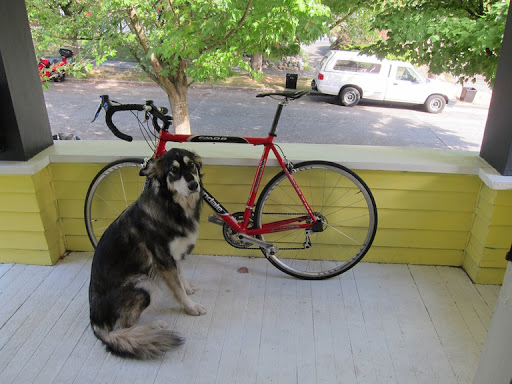

In [ ]:
from PIL import Image
img_pil= Image.open('obj-det-test.jpg').convert('RGB')
display(img_pil)

# Eval

In [ ]:
tensor = torchvision.transforms.functional.to_tensor(img_pil)
list_img= [tensor]
list_img= [tensor.to(device)]
model.eval()
with torch.no_grad():
  prediction= model(list_img)
prediction

[{'boxes': tensor([[ 86.7728, 150.9066, 211.5251, 356.7393],
          [111.6700,  77.0226, 379.2987, 293.9194],
          [ 84.7792,  90.0315, 187.7286, 257.6791],
          [312.7295,  52.2463, 455.4553, 112.3718],
          [314.6145,  54.6717, 457.0245, 112.3877],
          [ 83.9587,  74.3794, 275.9940, 266.2194],
          [475.3144,  15.1999, 507.3330, 167.7789],
          [ 84.2764, 155.8055, 147.4810, 252.5157],
          [476.9505,  12.9353, 511.8382, 181.5269],
          [ 39.0867,  56.6383,  67.0212,  82.3778],
          [451.4601,  60.7754, 478.6562, 103.7835],
          [ 80.7143,  88.7113, 341.3837, 272.8978],
          [ 36.9921,  57.0862,  65.7686,  84.0576],
          [ 71.9500, 109.6703, 254.5934, 247.4123],
          [ 88.9964, 140.8143, 212.4194, 358.0804],
          [454.2300,  23.2714, 496.6578, 116.2059],
          [ 58.3582,  47.6458,  75.1983,  57.9588],
          [ 38.0441,  55.5769,  67.2752,  81.8822],
          [ 58.6551,  47.6555,  74.0770,  57.8598],
   

# plot

In [ ]:
tensor.shape

torch.Size([3, 384, 512])

In [ ]:
boxes = prediction[0]['boxes']
labels = prediction[0]['labels']
scores = prediction[0]['scores']

if score > 0.6:

score ziyad bashe boxs kamtar peyda mikone

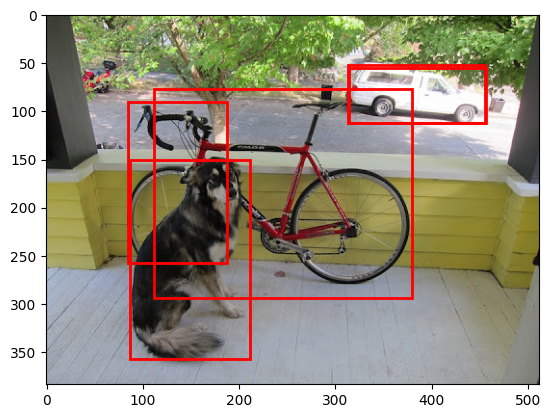

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

np_arr = tensor.permute(1, 2, 0).numpy()
plt.imshow(np_arr)

ax = plt.gca()
for box, label, score in zip(boxes, labels, scores):
  if score > 0.6:
    rect = Rectangle((box[0], box[1]),
                     (box[2] - box[0]),
                     (box[3] - box[1]),
                     fill=False,
                     edgecolor=(1, 0, 0),
                     linewidth=2)
    ax.add_patch(rect)

plt.show()

# train

In [ ]:
targets = []
target = {}
target['boxes'] = boxes
target['labels'] = labels
targets.append(target)
# print(targets[0])

model.train()
model(list_img, targets)

{'loss_classifier': tensor(0.6018, device='cuda:0', grad_fn=<NllLossBackward0>),
 'loss_box_reg': tensor(0.3761, device='cuda:0', grad_fn=<DivBackward0>),
 'loss_objectness': tensor(0.1099, device='cuda:0',
        grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
 'loss_rpn_box_reg': tensor(0.0445, device='cuda:0', grad_fn=<DivBackward0>)}

#3

At first download raccoon dataset from [link](https://github.com/experiencor/raccoon_dataset)

In [ ]:
!git clone https://github.com/experiencor/raccoon_dataset

In [ ]:
import os
import pandas as pd

In [ ]:
root = './raccoon_dataset'
phase = 'train'

img = os.listdir(os.path.join(root,'images'))
target = pd.read_csv(os.path.join(root,'data/{}_labels.csv'.format(phase)))

idx = 10
img_path = os.path.join(root, 'images', img[idx])

